In [1]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import brewer2mpl


def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

def load_data(sample_split=0.3, usage='Training',classes=['Angry','Happy'], filepath='fer20131.csv'):
    """
    The function load provided CSV dataset and further reshape, rescale the data for feeding
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

/Users/yasaman/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

X_test, y_test = load_data(sample_split=1.0,classes=emo,
usage='PrivateTest')

X_train, y_train = load_data(sample_split=1.0,classes=emo,
usage= 'Training')

X_val,y_val = load_data(sample_split=1.0,classes=emo,
usage= 'PublicTest')

Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)
(3589, 48, 48, 1)
(3589, 6)


In [4]:
def save_data(X_test, y_test, fname=''):
    """
    The function stores loaded data into numpy form for further processing
    """
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)
save_data(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (zip(labels, counts))

Private test set


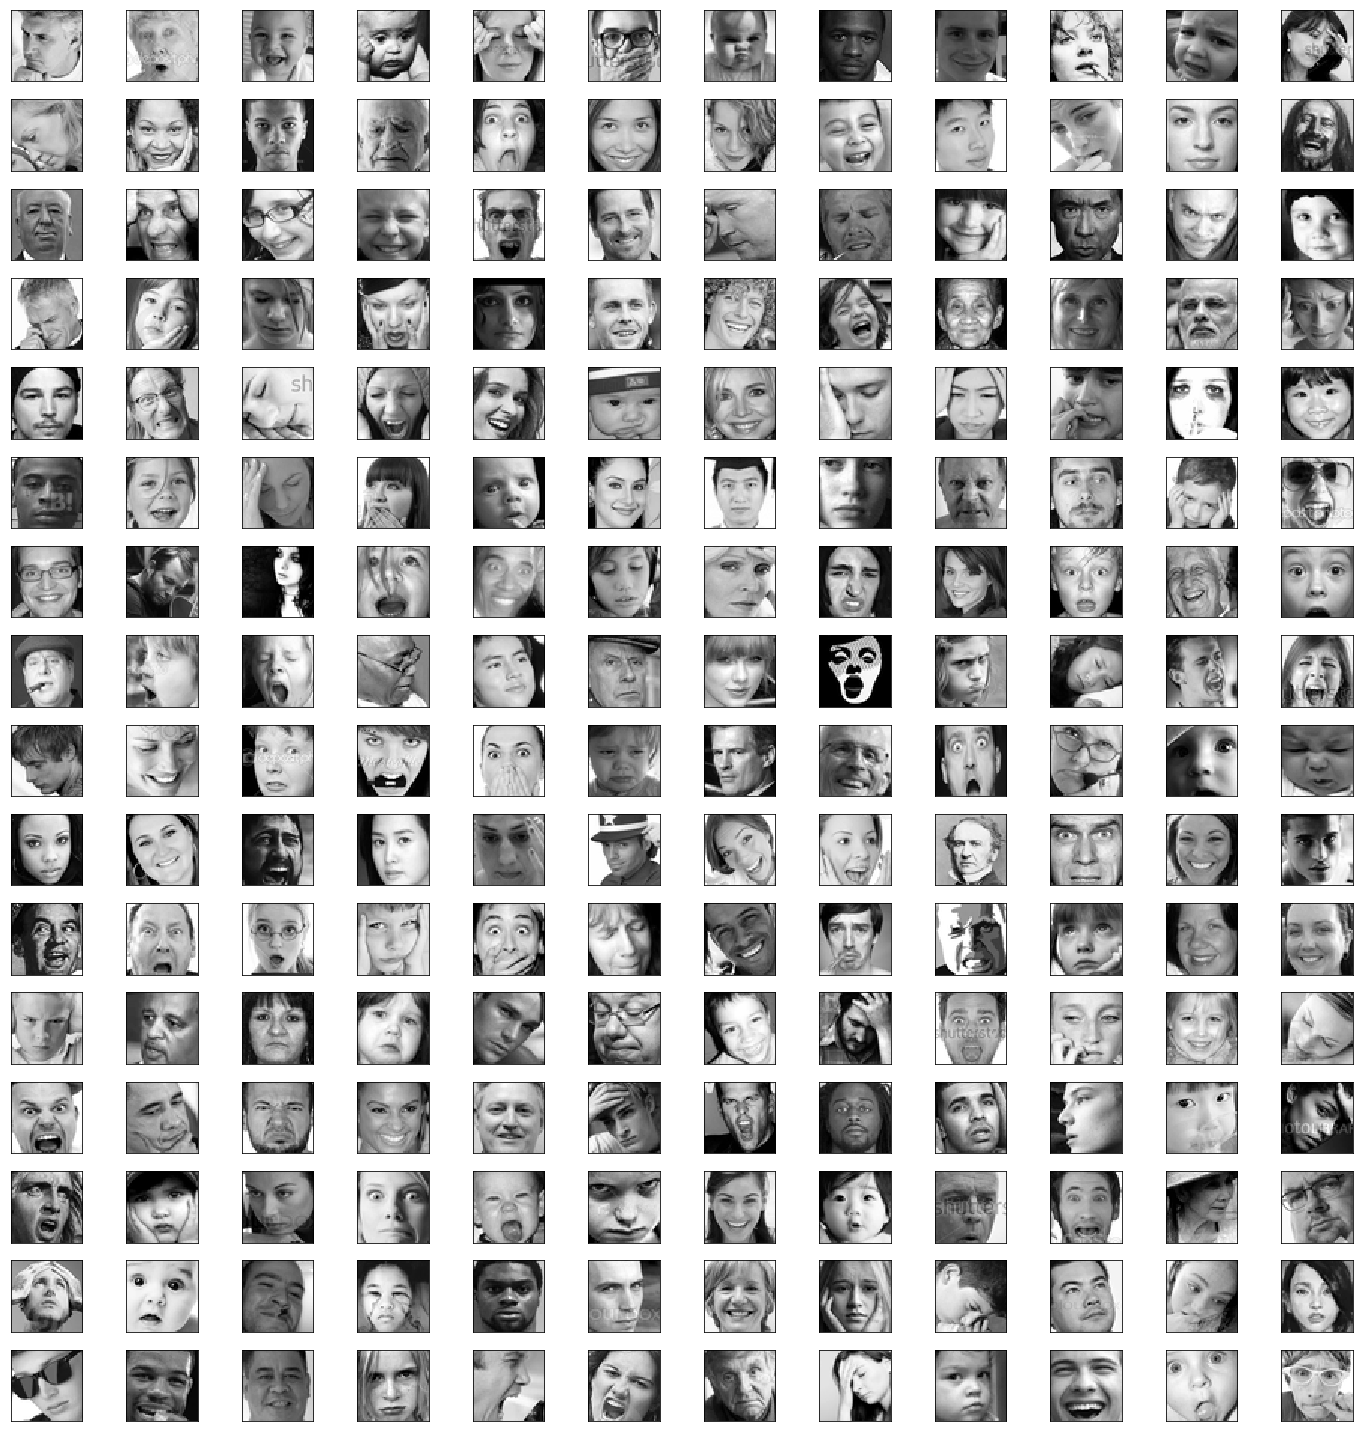

In [6]:
def overview(start, end, X):
    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191, X)

(1, 48, 48, 1)


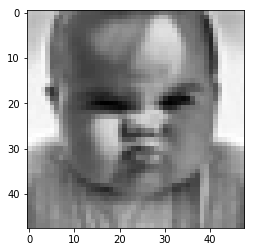

In [7]:
input_img = X[6:7,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

In [8]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

In [9]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, Normalizer
from sklearn.pipeline import make_pipeline

/Users/yasaman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
full_pipeline = make_pipeline(
    FunctionTransformer(lambda x: x.reshape((x.shape[0],-1)), validate = False), 
    Normalizer(),
    ######### TODO:Put your classifier name
    LogisticRegression()
    #DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #KNeighborsClassifier(3),

)

In [11]:
%%time
print(y_train, y_test)
###### Change y_train and y_test data from binary to integer array
###### Hint create y_train_cat and y_test_cat variables
# y_train_cat = np.argmax(y_train,-1)
# y_test_cat = np.argmax(y_test,-1)
##################################################################
print(y_train_cat, y_test_cat)
full_pipeline.fit(X_train, y_train_cat)

CPU times: user 1min 8s, sys: 1.97 s, total: 1min 10s
Wall time: 1min 13s


In [12]:
%%time
y_train_pred = full_pipeline.predict(X_train)
y_pred = full_pipeline.predict(X_test)

CPU times: user 724 ms, sys: 762 ms, total: 1.49 s
Wall time: 1.49 s


In [13]:
from sklearn.metrics import classification_report, classification

Text(0.5, 1.05, 'Validation Results')

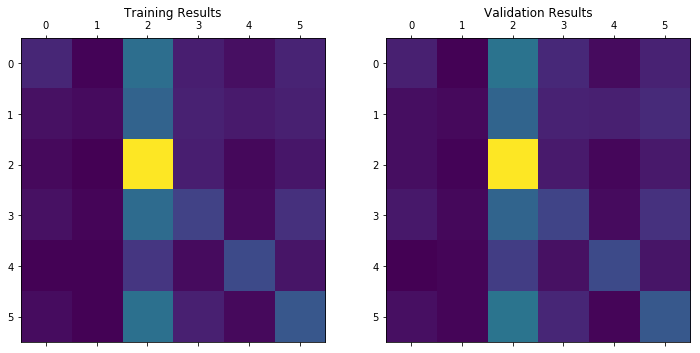

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.matshow(classification.confusion_matrix(y_train_cat, y_train_pred))
ax1.set_title('Training Results')
ax2.matshow(classification.confusion_matrix(y_test_cat, y_pred))
ax2.set_title('Validation Results')

In [15]:
print(classification_report(y_test_cat, y_pred))

             precision    recall  f1-score   support

          0       0.29      0.13      0.18       546
          1       0.22      0.05      0.08       528
          2       0.38      0.78      0.51       879
          3       0.30      0.25      0.27       594
          4       0.49      0.39      0.44       416
          5       0.35      0.32      0.33       626

avg / total       0.34      0.36      0.32      3589



In [16]:
print(y_test)
############ create a list of correct labels as emotions

label_correct = list()
# for i in y_test:
#     x=0
#     for j in i:
#         if (j==1.0):
#             label_correct.append(emo[x])
#         x = x + 1

print(label_correct)

hiii


In [19]:
print(y_train_pred)
Label_pred = list()
for i in y_train_pred:
    Label_pred.append(emo[i])

[5 2 5 ... 2 5 5]


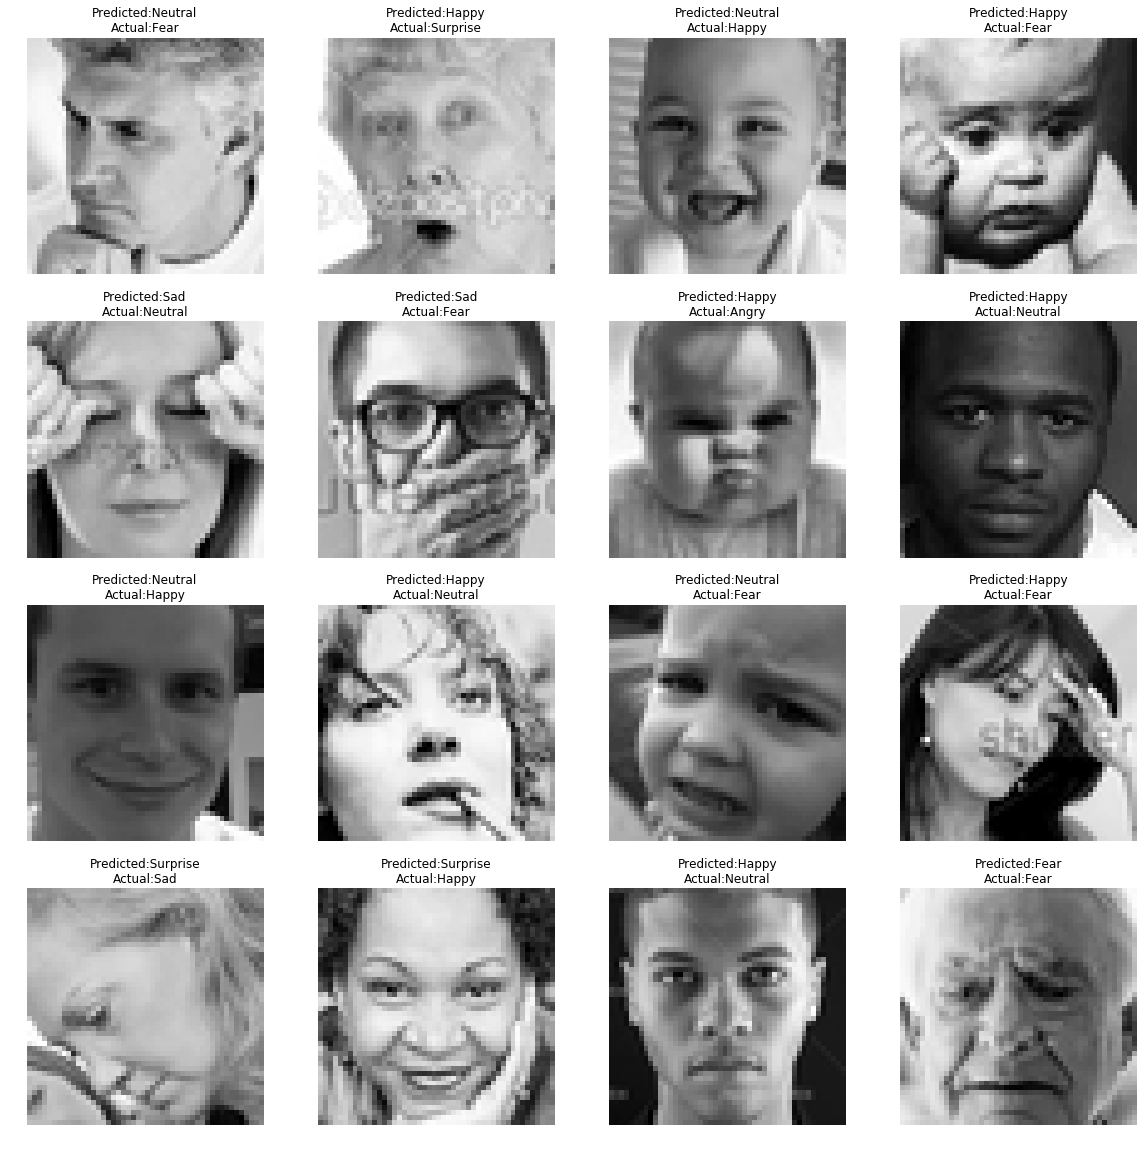

In [28]:
fig, m_ax = plt.subplots(4, 4, figsize = (20, 20))
########### Print images with predicted and actual emotion labels
# for c_ax, c_label, c_pred, c_img in zip(m_ax.flatten(), label_correct, Label_pred, X):
#      c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
#      c_ax.axis('off')
#      c_ax.set_title('Predicted:{}\nActual:{}'.format(c_pred, c_label))
##################################################################